In [1]:
import vtk
import numpy as np
import os 
from pathlib import Path
import vtkmodules.util.numpy_support

In [3]:
vtk.vtkImageReader(file_path)

: 

In [2]:
def load_vtk_file(file_path):
    # Leitura do arquivo VTK
    reader = vtk.vtkXMLImageDataReader()
    reader.SetFileName(file_path)
    reader.Update()

    return reader.GetOutput()

file_path = r"C:\ic_exxon\porenet_data_augmentation\data\vtk\polyhedra_output_-polyhedra-00000000.vtk"
vtk_file = load_vtk_file(file_path)

vtk_file

<vtkmodules.vtkCommonDataModel.vtkImageData(0x000001D66C730BE0) at 0x000001D67F4866E0>

In [59]:
vtk.vtkMatrix4x4().Identity()

In [57]:
def apply_slice(vtk_data, slice_position, output_dim=2):
    # Filtro para aplicar o slice
    reslice = vtk.vtkImageReslice()
    reslice.SetInputData(vtk_data)
    reslice.SetOutputDimensionality(output_dim)
    
    # Definir a posição do slice (por exemplo, no eixo Z)
    matrix = vtk.vtkMatrix4x4()
    matrix.Identity()
    matrix.SetElement(2, 3, slice_position)  # Mover o plano do slice para a posição desejada no eixo Z
    reslice.SetResliceAxes(matrix)
    
    reslice.Update()

    return reslice.GetOutput()

slice_data = apply_slice(vtk_file, 0, 0)

vtk_array = vtkmodules.util.numpy_support.vtk_to_numpy(
    slice_data.GetPointData().GetScalars()
)

vtk_array

array([1.24617431e-311])

In [40]:
vtk_array = vtkmodules.util.numpy_support.vtk_to_numpy(
    slice_data.GetPointData().GetScalars()
).reshape(
    slice_data.GetDimensions()[1],
    slice_data.GetDimensions()[0]
)

ValueError: cannot reshape array of size 8 into shape (2,2)

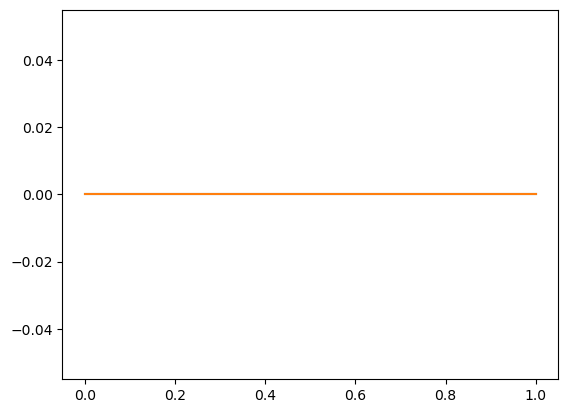

In [38]:
import matplotlib.pyplot as plt

plt.plot(vtk_array)


In [ ]:
def vtk_to_numpy(vtk_data):
    # Converte o resultado do slice VTK para numpy array
    dims = vtk_data.GetDimensions()
    vtk_array = vtk_data.GetPointData().GetScalars()
    numpy_array = vtkmodules.util.numpy_support.vtk_to_numpy(vtk_array)
    
    return numpy_array.reshape(dims[1], dims[0])  # Reshape de acordo com as dimensões do slice

In [27]:
slice_data.GetPointData().GetScalars()

<vtkmodules.vtkCommonCore.vtkTypeFloat64Array(0x0000024B3E6C1C20) at 0x0000024B41959DE0>